In [5]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

#impporting requirements


In [6]:
img = cv2.imread('/Classification Project/model/Test_images/Joey_Tribbiani.jpg')
img.shape
#reading an example image

(1200, 1200, 3)

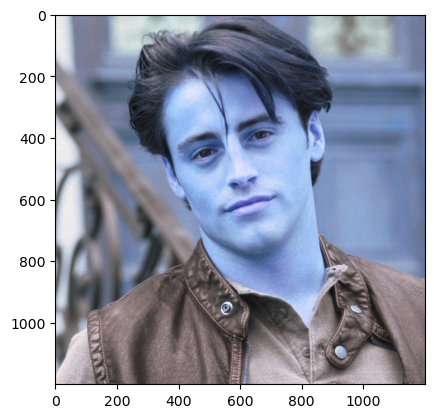

In [7]:
plt.imshow(img)

In [8]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape
#turning image to gray to remove RGB dimension

(1200, 1200)

In [9]:
gray

array([[238, 236, 234, ..., 131, 132, 132],
       [239, 237, 236, ..., 132, 133, 133],
       [239, 237, 237, ..., 133, 133, 134],
       ...,
       [219, 215, 211, ...,  99,  98,  97],
       [217, 212, 206, ..., 101,  99,  97],
       [215, 209, 203, ..., 102,  99,  96]], dtype=uint8)

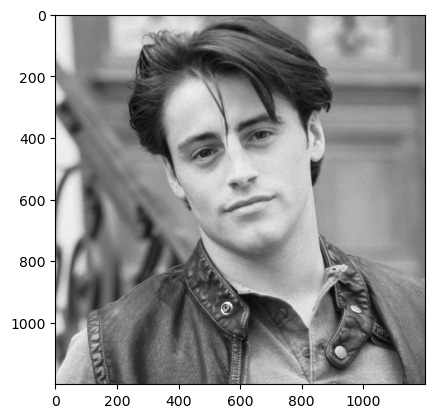

In [10]:
plt.imshow(gray,cmap='gray')

In [11]:
#using Haar Cascades face detection
#uses a moving window to detect eyes and nose
#we will use openCV Haar Cascade built-in pre-trained classifiers detection

face_cascade = cv2.CascadeClassifier('/Classification Project/model/OpenCV/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/Classification Project/model/OpenCV/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces
#returns an array of faces, the four values are the coordinates of the face bounding boxes


array([[296, 200, 559, 559]])

In [12]:
#turn the array into x,y coordinates
(x,y,w,h) = faces[0]
x,y,w,h

(296, 200, 559, 559)

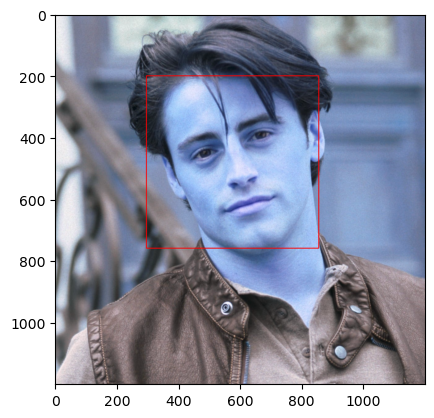

In [13]:
#drawing the bounding box (2D) over the orriginal image
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)


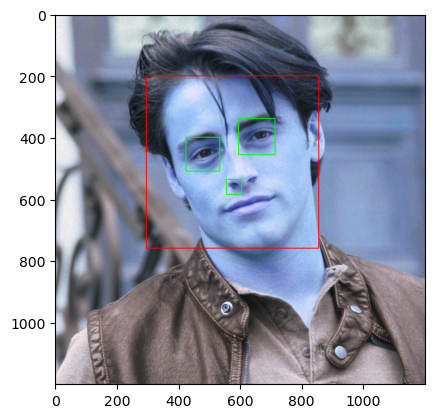

In [14]:
#drawing the eyes
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

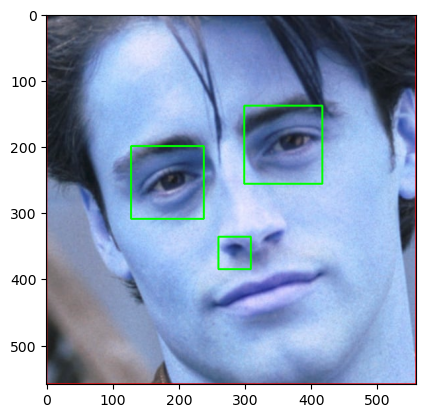

In [15]:
#cropping a region of interest
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [16]:
#we will be identifying face region of interest in all of our photos in our dataset
#if number of eyes detected is >=2 then we will return the image


def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is not None:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >= 2:
                return roi_color

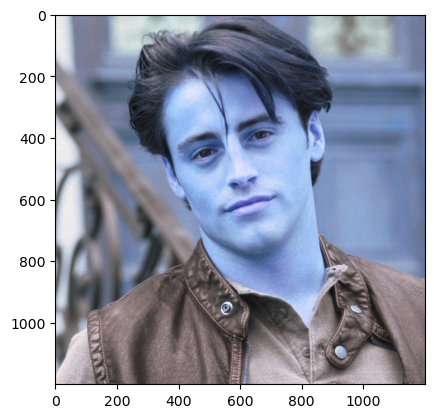

In [17]:
#function works with original image
original_image = cv2.imread('/Classification Project/model/Test_images/Joey_Tribbiani.jpg')
plt.imshow(original_image)

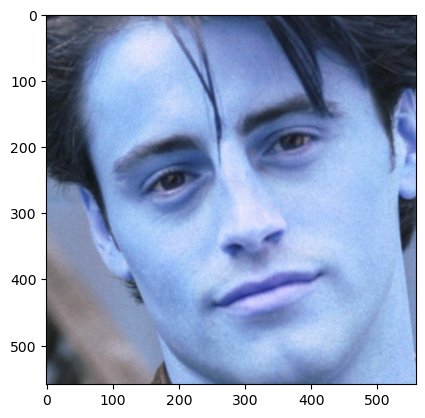

In [18]:
#cropping function works with original image
cropped_image = get_cropped_image_if_2_eyes('/Classification Project/model/Test_images/Joey_Tribbiani.jpg')
plt.imshow(cropped_image)


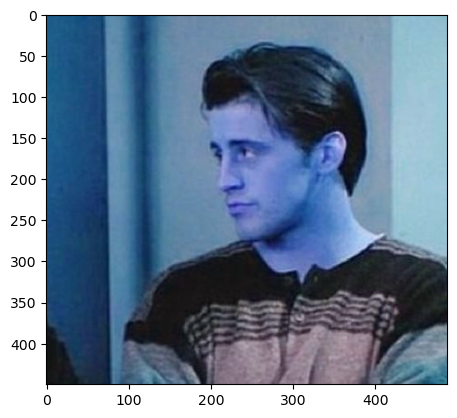

In [19]:
#testing croping with obstructed image
org_image_obstructed = cv2.imread('/Classification Project/model/Test_images/Joey_Tribbiani2.jpg')
plt.imshow(org_image_obstructed)

In [20]:
#nothing happens when both eyes are not showing
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('/Classification Project/model/Test_images/Joey_Tribbiani2.jpg')
cropped_image_no_2_eyes


# Creating Files for Cropped Images

In [21]:
#we will create a new folder to store all successfully cropped images
path_to_data = '/Classification Project/model/Dataset/'
path_to_cr_data = '/Classification Project/model/Dataset/cropped/' #cropped folder
#path_to_data = "./Dataset/"
#path_to_cr_data = "./Dataset/cropped/"

In [58]:
#os scan will go through all sub-directories within the 'Dataset' folder
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [59]:
img_dirs


['/Classification Project/model/Dataset/Chandler',
 '/Classification Project/model/Dataset/cropped',
 '/Classification Project/model/Dataset/Joey',
 '/Classification Project/model/Dataset/Monica',
 '/Classification Project/model/Dataset/Phoebe',
 '/Classification Project/model/Dataset/Rachel',
 '/Classification Project/model/Dataset/Ross']

In [60]:
#creating cropped folder inside the 'Dataset' folder
#if os.path.exists exists, it will be removed, 
#the final line will create a new cropped folder
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [61]:
#cropped_image_dirs contains the cropped folder path of each person
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    #the / will store the tokens to get to the images (ex: Classificaiton project and model and dataset...)
    #the [-1] takes the last part of the list of strings. The celebrity name. 
    
    #this is appending the name dictionary. A blank array
    celebrity_file_names_dict[celebrity_name] = []
    
    #going though each file to look at celebrities and crop an image if 2 eyes are detected
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None: #function will return no image if no eyes are detected and store good cropped photos
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder): #if cropped folder does not exist, we will create one
                os.makedirs(cropped_folder) #python's function to create folder
                cropped_image_dirs.append(cropped_folder) 
                print("Generating cropped images in folder: ",cropped_folder)
            
            #writing names for each image
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            #first argument is file path, second argument is region of interest from cropped image
            cv2.imwrite(cropped_file_path, roi_color)
            #store all file names into dictionary in an ordered way
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1                    
  


Chandler
Generating cropped images in folder:  /Classification Project/model/Dataset/cropped/Chandler
cropped
Joey
Generating cropped images in folder:  /Classification Project/model/Dataset/cropped/Joey
Monica
Generating cropped images in folder:  /Classification Project/model/Dataset/cropped/Monica
Phoebe
Generating cropped images in folder:  /Classification Project/model/Dataset/cropped/Phoebe
Rachel
Generating cropped images in folder:  /Classification Project/model/Dataset/cropped/Rachel
Ross
Generating cropped images in folder:  /Classification Project/model/Dataset/cropped/Ross


# Manually Delete Unwanted Cropped Images

In [63]:

celebrity_file_names_dict = {} #recreating the celebrity name dictionary because we deleted some photos
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Chandler': ['/Classification Project/model/Dataset/cropped/Chandler\\Chandler1.png',
  '/Classification Project/model/Dataset/cropped/Chandler\\Chandler10.png',
  '/Classification Project/model/Dataset/cropped/Chandler\\Chandler11.png',
  '/Classification Project/model/Dataset/cropped/Chandler\\Chandler12.png',
  '/Classification Project/model/Dataset/cropped/Chandler\\Chandler13.png',
  '/Classification Project/model/Dataset/cropped/Chandler\\Chandler14.png',
  '/Classification Project/model/Dataset/cropped/Chandler\\Chandler15.png',
  '/Classification Project/model/Dataset/cropped/Chandler\\Chandler16.png',
  '/Classification Project/model/Dataset/cropped/Chandler\\Chandler17.png',
  '/Classification Project/model/Dataset/cropped/Chandler\\Chandler18.png',
  '/Classification Project/model/Dataset/cropped/Chandler\\Chandler19.png',
  '/Classification Project/model/Dataset/cropped/Chandler\\Chandler2.png',
  '/Classification Project/model/Dataset/cropped/Chandler\\Chandler21.png',
  

# Feature Engineering


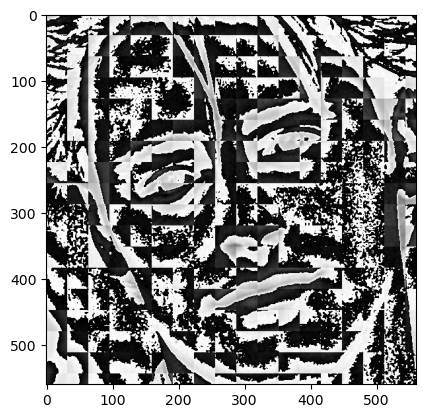

In [64]:
import numpy as np
import pywt #python wavelet transform
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img
    #datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray = np.float32(imArray)
    imArray /= 255 #normalizing the values from 0 to 1
    #compute coefficients
    coeffs=pywt.wavedec2(imArray, mode, level=level)
    
    #process Coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0] *=0;
    
    #reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har,cmap='gray')

    

In [65]:
#creating a dictionary to assign numbers to the celebrity 

class_dict={}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict


{'Chandler': 0, 'Joey': 1, 'Monica': 2, 'Phoebe': 3, 'Rachel': 4, 'Ross': 5}

In [66]:
#We will be stacking these Wavelet Transforms on top of the original images
#we will go though the dictionary that we created (iterate)
#though every person in each file


X=[]
y=[]

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files: #training_image is the path of the image
        img = cv2.imread(training_image)
        if img is None: #we manually deleted some images. If an image is NOT present, cv2 returns "none" and we continue anyway
            continue
        scalled_raw_img = cv2.resize(img, (32,32)) #resizing raw photo with opencv for consistancy
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har,(32,32)) #resizing cropped haar image with opencv for consistancy
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1))) #using np to stack these images on top of eachother
        X.append(combined_img)#python list
        y.append(class_dict[celebrity_name]) #the output will be the celebrity name but we will use numbers to represent the names. 

In [67]:
#len(x) #x is a list and we see how many images total there are
len(X[0]) #each element in x is an image with 4096 raw pixel size (32*32*3 + 32*32)


4096

In [68]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape  #reshaping it to represent as a float number for debugging (a 1D list) 

(332, 4096)

# Training the model

 trying support vector machines first and tuning with heuristic finetuning


In [69]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [70]:
#first is to split x and y data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))]) #these parameters were arbritarily chosen
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test) #check how good model is running
#len(X_test) #number of test images, ours is kinda small


0.7108433734939759

In [71]:
print(classification_report(y_test, pipe.predict(X_test)))


              precision    recall  f1-score   support

           0       0.53      0.67      0.59        12
           1       0.92      0.61      0.73        18
           2       0.87      0.87      0.87        15
           3       0.73      0.50      0.59        16
           4       0.67      0.80      0.73        15
           5       0.58      1.00      0.74         7

    accuracy                           0.71        83
   macro avg       0.72      0.74      0.71        83
weighted avg       0.74      0.71      0.71        83



In [72]:
#using gridsearch to try out different parameters with different models to try
#svm, random forest, log regression..
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [73]:
#dictionary of model parameters
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [74]:
#goes though every model we selected and append the scores
# cv is cross validation into 5 folds. 
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.734776,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.501878,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.734776,{'logisticregression__C': 10}


In [75]:
#we created a list of the scores
#svm is giving us the best results with the parameters C value = 1 and 'linear'
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=10, solver='liblinear'))])}

In [76]:
best_estimators['svm'].score(X_test,y_test) #using the test set of data

0.7108433734939759

In [77]:
best_estimators['random_forest'].score(X_test,y_test)

0.46987951807228917

In [78]:
best_estimators['logistic_regression'].score(X_test,y_test) 
#even though this is the same results as svm, we will use svm as it showed a little 
#better results on the training/validation data.

0.7831325301204819

In [79]:
best_clf = best_estimators['svm']

In [80]:
#we will be using a confusion matrix next
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 9,  1,  0,  2,  0,  0],
       [ 3, 12,  1,  0,  0,  2],
       [ 1,  0, 12,  0,  1,  1],
       [ 2,  0,  0,  7,  6,  1],
       [ 1,  0,  1,  1, 12,  0],
       [ 0,  0,  0,  0,  0,  7]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

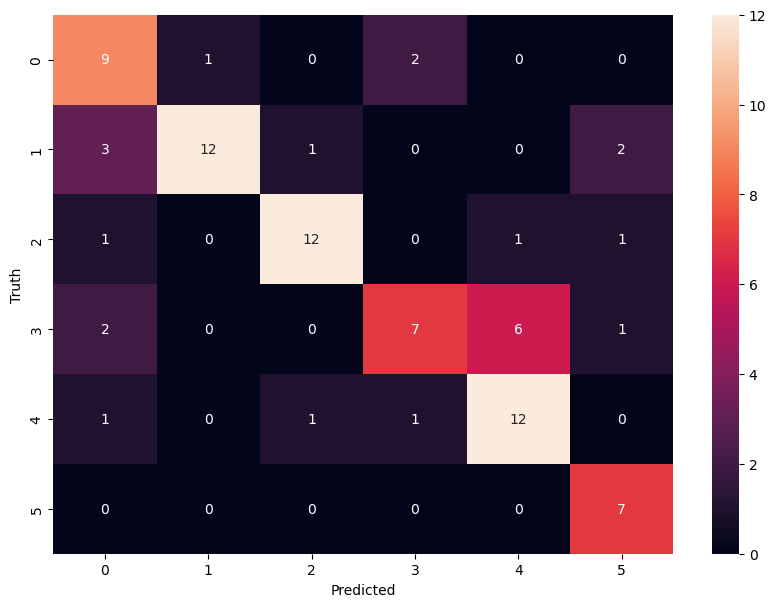

In [81]:
#the same grid but visuallized with the seaborn library
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [82]:
class_dict
#the y access is the true class number, the x access is the predicted
#tells how many samples of a model are predicted correctly
#ex: Chandler Bing (0:0) tells how many models were predicted correctly
#ex: out of all the test samples, it predicted 10 times (correctly) it was Chandler

{'Chandler': 0, 'Joey': 1, 'Monica': 2, 'Phoebe': 3, 'Rachel': 4, 'Ross': 5}

### Saving our model 

In [83]:

!pip install joblib
import joblib 
# Save the model as a pickle in a file 
#arguments: best classifyer, name of file to save as
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

### Save class dictionary

In [84]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))
    
#we will use this model in a python flask server